# Analysis of Yelp Business Intelligence Data

We will analyze a subset of Yelp's business, reviews and user data. This dataset comes to us from [Kaggle](https://www.kaggle.com/yelp-dataset/yelp-dataset)

# Installation and Initial Setup

In [1]:
sc.install_pypi_package("pandas==1.0.3")
sc.install_pypi_package("matplotlib==3.2.1")
sc.install_pypi_package("seaborn==0.10.0")

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
1,application_1606179605979_0002,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/4a/6a/94b219b8ea0f2d580169e85ed1edc0163743f55aaeca8a44c2e8fc1e344e/pandas-1.0.3-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/d4/70/d60450c3dd48ef87586924207ae8907090de0b306af2bce5d134d78615cb/python_dateutil-2.8.1-py2.py3-none-any.whl

  Using cached https://files.pythonhosted.org/packages/b2/c2/71fcf957710f3ba1f09088b35776a799ba7dd95f7c2b195ec800933b276b/matplotlib-3.2.1-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/8a/bb/488841f56197b13700afd5658fc279a2025a39e22449b7cf29864669b15d/pyparsing-2.4.7-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/d2/46/231de802ade4225b76b96cffe419cf3ce52bbe92e3b092cf12db7d11c207/kiwisolver-1.3.1-cp37-cp37m-manylinux1_x86_64.whl

  Usi

## Importing

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Loading Data

In [3]:
business_df = spark.read.json \
("s3://sta9670-spark-datasets/yelp_academic_dataset_business.json")
checkin_df = spark.read.json \
("s3://sta9670-spark-datasets/yelp_academic_dataset_checkin.json")
review_df = spark.read.json \
("s3://sta9670-spark-datasets/yelp_academic_dataset_review.json")
tip_df = spark.read.json \
("s3://sta9670-spark-datasets/yelp_academic_dataset_tip.json")
user_df = spark.read.json \
("s3://sta9670-spark-datasets/yelp_academic_dataset_user.json")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Overview of Data

Number of rows and columns in our dataset.

In [4]:
print(f"Columns: {len(business_df.columns)} | Rows: {business_df.count()}")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Columns: 14 | Rows: 209393

DataFrame schema.

In [5]:
business_df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable = true)
 |    |-- GoodForDancing: str

First 5 rows with the following columns:

* `business_id`
* `name`
* `city`
* `state`
* `categories`

In [6]:
business_df.select("business_id","name","city","state","stars","categories").show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+---------------+-----+-----+--------------------+
|         business_id|                name|           city|state|stars|          categories|
+--------------------+--------------------+---------------+-----+-----+--------------------+
|f9NumwFMBDn751xgF...|The Range At Lake...|      Cornelius|   NC|  3.5|Active Life, Gun/...|
|Yzvjg0SayhoZgCljU...|   Carlos Santo, NMD|     Scottsdale|   AZ|  5.0|Health & Medical,...|
|XNoUzKckATkOD1hP6...|             Felinus|       Montreal|   QC|  5.0|Pets, Pet Service...|
|6OAZjbxqM5ol29BuH...|Nevada House of Hose|North Las Vegas|   NV|  2.5|Hardware Stores, ...|
|51M2Kk903DFYI6gnB...|USE MY GUY SERVIC...|           Mesa|   AZ|  4.5|Home Services, Pl...|
+--------------------+--------------------+---------------+-----+-----+--------------------+
only showing top 5 rows

# Analyzing Categories

Let's now answer this question: **how many unique categories are represented in this dataset?**

First create table with single categories per business ID


In [7]:
categories = business_df.select("business_id","categories")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [8]:
import pyspark.sql.functions as F
association_table = categories.withColumn \
("categories", F.explode(F.split("categories",",")))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

First 5 rows of our new table.

In [9]:
association_table.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----------------+
|         business_id|       categories|
+--------------------+-----------------+
|f9NumwFMBDn751xgF...|      Active Life|
|f9NumwFMBDn751xgF...| Gun/Rifle Ranges|
|f9NumwFMBDn751xgF...|      Guns & Ammo|
|f9NumwFMBDn751xgF...|         Shopping|
|Yzvjg0SayhoZgCljU...| Health & Medical|
+--------------------+-----------------+
only showing top 5 rows

## Total Unique Categories


In [10]:
association_table = association_table.withColumn \
("categories", F.trim(association_table.categories))
association_table.select("categories").distinct().count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

1336

## Top Categories By Business


In [11]:
association_table.groupby("categories").count().show(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|          categories|count|
+--------------------+-----+
|      Paddleboarding|   36|
|      Dermatologists|  341|
|        Aerial Tours|   28|
|         Hobby Shops|  828|
|          Bubble Tea|  720|
|             Embassy|   13|
|             Tanning|  938|
|            Handyman|  682|
|      Aerial Fitness|   29|
|             Falafel|  159|
|       Outlet Stores|  399|
|        Summer Camps|  318|
|     Clothing Rental|   55|
|      Sporting Goods| 2311|
|     Cooking Schools|  118|
|  College Counseling|   15|
|  Lactation Services|   50|
|Ski & Snowboard S...|   50|
|             Museums|  359|
|              Doulas|   45|
+--------------------+-----+
only showing top 20 rows

### Bar Chart of Top Categories


In [12]:
association_table_plot = association_table.groupby \
("categories").count().orderBy("count", ascending=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [13]:
pandaslist = association_table_plot.head(20)
forpandasdf = spark.createDataFrame(pandaslist).toDF("categories","count")
association_pandas_df = forpandasdf.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

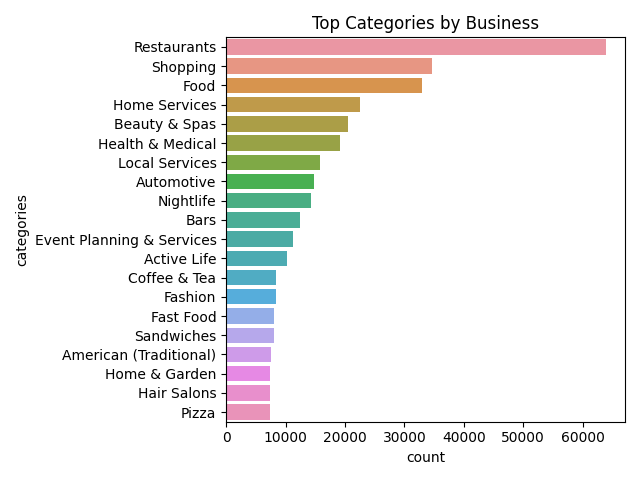

In [14]:
ax = sns.barplot(x="count", y="categories", data=association_pandas_df).set_title \
("Top Categories by Business")
plt.tight_layout()
plt.show()
%matplot plt

# Do Yelp Reviews Skew Negative?

Oftentimes, it is said that the only people who write a written review are those who are extremely _dissatisfied_ or extremely _satisfied_ with the service received. 

How true is this really? Let's try and answer this question.

Review data schema

In [15]:
review_df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)

Let's begin by listing the `business_id` and `stars` columns together for the user reviews data.

In [16]:
review_df.select("business_id","stars").show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|         business_id|stars|
+--------------------+-----+
|-MhfebM0QIsKt87iD...|  2.0|
|lbrU8StCq3yDfr-QM...|  1.0|
|HQl28KMwrEKHqhFrr...|  5.0|
|5JxlZaqCnk1MnbgRi...|  1.0|
|IS4cv902ykd8wj1TR...|  4.0|
+--------------------+-----+
only showing top 5 rows

Now, let's aggregate along the `stars` column to get a resultant dataframe that displays _average stars_ per business as accumulated by users who took the time to submit a written review.

In [17]:
avg_stars_df = review_df.groupby("business_id").avg("stars")
avg_stars_df.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------------+
|         business_id|        avg(stars)|
+--------------------+------------------+
|VHsNB3pdGVcRgs6C3...| 3.411764705882353|
|RMjCnixEY5i12Ciqn...|3.5316455696202533|
|ipFreSFhjClfNETuM...|               2.6|
|dLDMU8bOLnkDTmPUr...| 4.942857142857143|
|Qm2datcYBPXrPATVG...| 4.352941176470588|
+--------------------+------------------+
only showing top 5 rows

Let's join our two dataframes (reviews and business data) by `business_id`. 

In [18]:
review_and_business_df = avg_stars_df.join(business_df, ["business_id"])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [19]:
review_and_business_df.select("avg(stars)","stars","name","city","state").orderBy \
("avg(stars)", ascending=False).show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+-----+--------------------+----------+-----+
|avg(stars)|stars|                name|      city|state|
+----------+-----+--------------------+----------+-----+
|       5.0|  5.0|  Larry Fafalak, LMT| Las Vegas|   NV|
|       5.0|  5.0|   Rentech Solutions|Willoughby|   OH|
|       5.0|  5.0|Everest Curry and...|   Calgary|   AB|
|       5.0|  5.0|Krown Rust Contro...|   Markham|   ON|
|       5.0|  5.0|     EVO Swim School|      Mesa|   AZ|
+----------+-----+--------------------+----------+-----+
only showing top 5 rows

Calculating and graphing the "skew"

In [20]:
skew_df = review_and_business_df.withColumn \
("skew", (F.col("avg(stars)") - F.col("stars")) / F.col("stars"))
pandaslist = skew_df.select("skew").head(10000)
skew_for_pandas = spark.createDataFrame(pandaslist).toDF("skew")
skew_pandas = skew_for_pandas.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

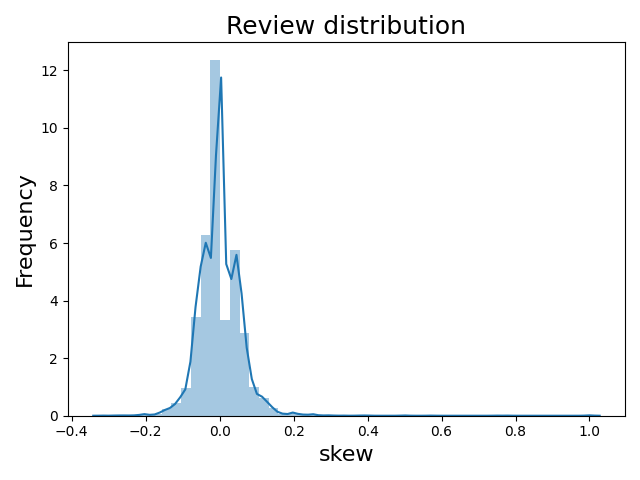

In [42]:
plt.clf()
sns.distplot(skew_pandas['skew'])
plt.title('Review distribution', fontsize=18)
plt.xlabel('skew', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.tight_layout()
plt.show()
%matplot plt


<b>Yelp written reviews skew only slightly negative with the sample of 10000 records, so I would say business reviews are quite accuratly assigned.</b>

# How do Elite users and their reviews compare to Non-elite users


User data schema

In [22]:
user_df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- average_stars: double (nullable = true)
 |-- compliment_cool: long (nullable = true)
 |-- compliment_cute: long (nullable = true)
 |-- compliment_funny: long (nullable = true)
 |-- compliment_hot: long (nullable = true)
 |-- compliment_list: long (nullable = true)
 |-- compliment_more: long (nullable = true)
 |-- compliment_note: long (nullable = true)
 |-- compliment_photos: long (nullable = true)
 |-- compliment_plain: long (nullable = true)
 |-- compliment_profile: long (nullable = true)
 |-- compliment_writer: long (nullable = true)
 |-- cool: long (nullable = true)
 |-- elite: string (nullable = true)
 |-- fans: long (nullable = true)
 |-- friends: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- name: string (nullable = true)
 |-- review_count: long (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)
 |-- yelping_since: string (nullable = true)

### Elite user dataframe

In [23]:
eliteUser_df = user_df.select("user_id","elite").where(F.length(F.col("elite")) != 0)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [24]:
eliteUser_reviews = eliteUser_df.join(review_df, ["user_id"])
eliteUser_reviews.select("user_id","elite","business_id","stars").show(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-------------------+--------------------+-----+
|             user_id|              elite|         business_id|stars|
+--------------------+-------------------+--------------------+-----+
|1Dul59QEe-Q-7OQHT...|               2017|-8F04F54iDT6VgWPC...|  4.0|
|3pMczoCBOSKBcqMhV...|               2017|p2OOk46G_AOO0nCWl...|  5.0|
|jO44Apni7iJZVVK4H...|2010,2011,2012,2013|jyFoxS8MofdpkAAK6...|  1.0|
|RO78oDy7vbEcOJU8a...|          2017,2018|ewty6EB70nwPJsUkA...|  4.0|
|TFxeEvpjMNQ3AWL49...|          2017,2018|0M3KCmdY-_xlIu5vE...|  5.0|
|Fl1oTs6usaCfyjLnY...|2011,2012,2013,2014|-h0o-BilkKaCa7HX9...|  5.0|
|RO78oDy7vbEcOJU8a...|          2017,2018|DEtOIjhV0MWZ8fD8-...|  5.0|
|LEr8vS6PRymCg-SJH...|               2018|Jt28TYWanzKrJYYr0...|  2.0|
|M7vDDzoPNQDN2FdTc...|2015,2016,2017,2018|NFm869_w6cvVaWaNp...|  5.0|
|Ania9MCwET-TBzVjV...|2015,2016,2017,2018|Da6eZFThE9xanUAGN...|  4.0|
|iQ0TzrwN4BgflE8Ao...|               2018|jAIeziQkY_JScpBT1...|  5.0|
|BwfJx0BwTT34qhA0U..

### Adding review length column:

In [25]:
review_stats = eliteUser_reviews.select("stars", "text", "useful", "funny", "cool").\
withColumn("review_length", F.length("text"))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### Converting to pandas dataframe and plotting (sample of 10000 records)

In [26]:
pandaslist = review_stats.head(10000)
for_pandas = spark.createDataFrame(pandaslist).toDF \
("stars", "text", "useful", "funny", "cool", "review_length")
review_stats_pandas = for_pandas.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

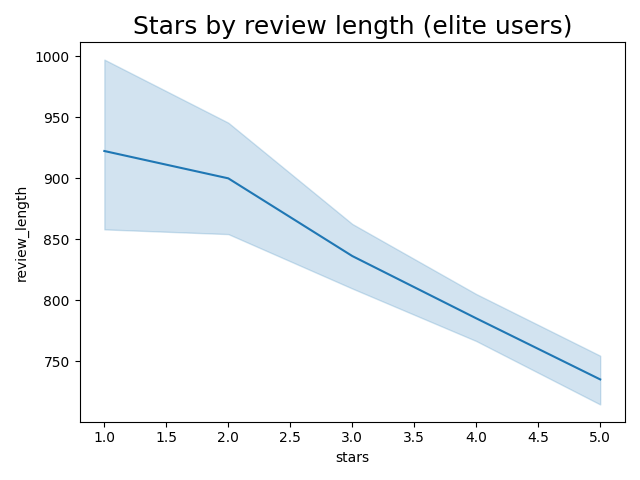

In [43]:
plt.clf()
sns.lineplot(data=review_stats_pandas, x="stars", y="review_length")
plt.title('Stars by review length (elite users)', fontsize=18)
plt.tight_layout()
plt.show()
%matplot plt

### Adding review rating column

In [28]:
rating = []
for row in review_stats_pandas['review_length']:
    if row < 1000 :    
        rating.append('short')
    elif row < 3000:   
        rating.append('medium')
    else:  
        rating.append('long')


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [29]:
review_stats_pandas['review_rating'] = rating
 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Non elite users

In [30]:
not_eliteUser_df = user_df.select("user_id","elite").where \
(F.length(F.col("elite")) == 0)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [31]:
not_eliteUser_reviews = not_eliteUser_df.join(review_df, ["user_id"])
review_stats2 = not_eliteUser_reviews.select \
("stars", "text", "useful", "funny", "cool").withColumn \
("review_length", F.length("text"))
not_eliteUser_reviews.select("user_id","elite","business_id","stars").show(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+--------------------+-----+
|             user_id|elite|         business_id|stars|
+--------------------+-----+--------------------+-----+
|---RfKzBwQ8t3wu-L...|     |Z3ZSar8IVAR2qIupq...|  5.0|
|--1UpCuUDJQbqiuFX...|     |kJhQq1BFz7lOYLve7...|  1.0|
|--1UpCuUDJQbqiuFX...|     |EpPOZAG0u7qHP-jv5...|  5.0|
|--AGAPpP1pgp1afbq...|     |OLmcIJ7VBCxaYhZSN...|  5.0|
|--AGAPpP1pgp1afbq...|     |WoiOpMEcbAfOqNYXq...|  5.0|
|--C-42rr7hPSsUROJ...|     |L-_-9JNAb6UDyq7wa...|  4.0|
|--ChzqcPs4YFWlw1j...|     |6pG7n8Rx_7ZXeQQk6...|  2.0|
|--ChzqcPs4YFWlw1j...|     |4KmrrhtfnngTVFa2d...|  4.0|
|--ChzqcPs4YFWlw1j...|     |F9CcIFltPDXiOkCCF...|  4.0|
|--ChzqcPs4YFWlw1j...|     |AMTNJbYbu0OMMAkx4...|  4.0|
|--ChzqcPs4YFWlw1j...|     |KVsv8wRGnLX8QWoNZ...|  3.0|
|--ET3paBtrThD95dk...|     |QZV9hW3WP9o9SmmV2...|  5.0|
|--GLTFzU93A40YB56...|     |pT6baSMzC6rZfwhp_...|  5.0|
|--I4wRDhmM2J2VLzK...|     |JmI9nslLD7KZqRr__...|  2.0|
|--RquisWmBzcezXZr...|     |W2Vis19kUa7kP6GkS...

### Converting to pandas dataframe 

In [32]:
pandaslist2 = review_stats2.head(10000)
for_pandas2 = spark.createDataFrame(pandaslist2).toDF \
("stars", "text", "useful", "funny", "cool", "review_length")
review_stats_pandas2 = for_pandas2.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

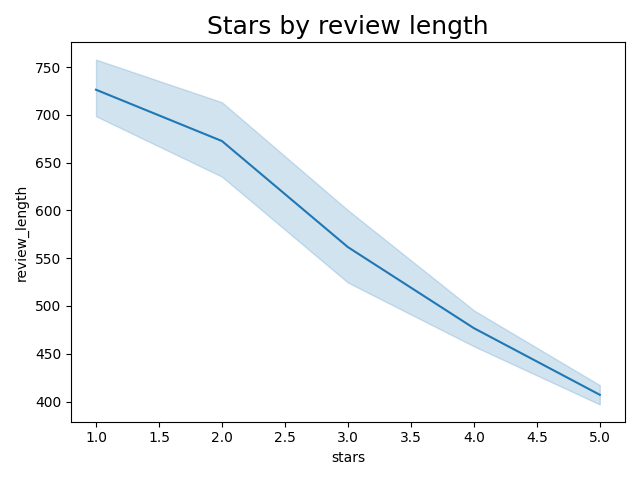

In [44]:
plt.clf()
sns.lineplot(data=review_stats_pandas2, x="stars", y="review_length")
plt.title('Stars by review length', fontsize=18)
plt.tight_layout()
plt.show()
%matplot plt

##### from two line charts above, it is clear that both, elite and non-elite users aremore likely to write a lengthy review, if they are dissatisfied with the service and giving a low rating to the business, but it is notable that there is more spread in the case of elite users.

### Adding review rating

In [34]:
rating2 = []
for row in review_stats_pandas2['review_length']:
    if row < 1000 :    
        rating2.append('short')
    elif row < 3000:   
        rating2.append('medium')
    else:  
        rating2.append('long')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [35]:
review_stats_pandas2['review_rating'] = rating2

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Plotting

##### From bar charts below, It appears that elite users have lengthier and more concise medium and long reviews than non-elite users and therefore deserve more useful ratings. Whereas non elite users only give lengthy reviews, when they are dissatisfied or angry with the service provided and giving only 1 star rating 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

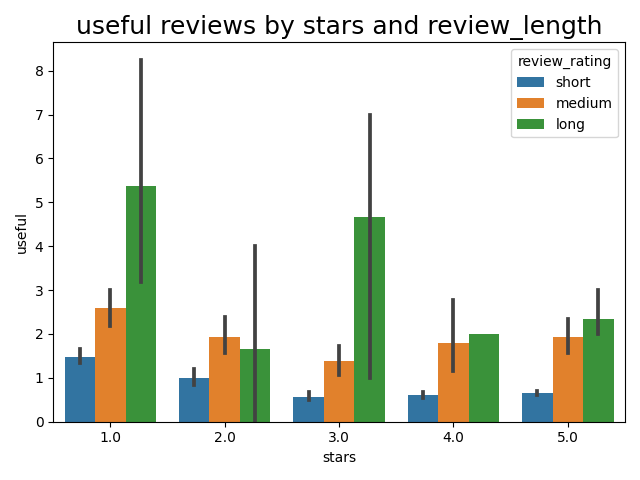

In [45]:
plt.clf()
sns.barplot(x = 'stars', y = 'useful', hue = 'review_rating', \
            data = review_stats_pandas2)
plt.title('useful reviews by stars and review_length', fontsize=18)
plt.tight_layout()
plt.show()
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

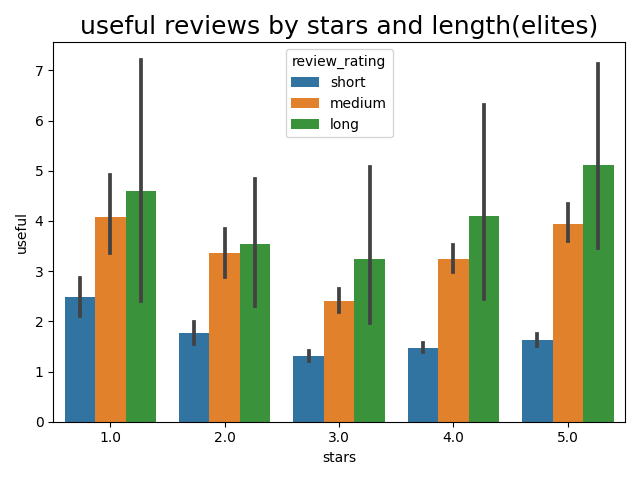

In [46]:
plt.clf()
sns.barplot(x = 'stars', y = 'useful', hue = 'review_rating', \
            data = review_stats_pandas)
plt.title('useful reviews by stars and length(elites)', fontsize=18)
plt.tight_layout()
plt.show()
%matplot plt

## Review length

##### both, elite and non-elite users are not willing to give long reviews, but it seems like that elite users are more likely to give medium length reviews, and this is probably what differentiates them from non-elites.

In [38]:
for_pie_pdf = review_stats_pandas.groupby('review_rating').count()
for_pie_pdf

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

               stars  text  useful  funny  cool  review_length
review_rating                                                 
long             108   108     108    108   108            108
medium          2554  2554    2554   2554  2554           2554
short           7338  7338    7338   7338  7338           7338

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

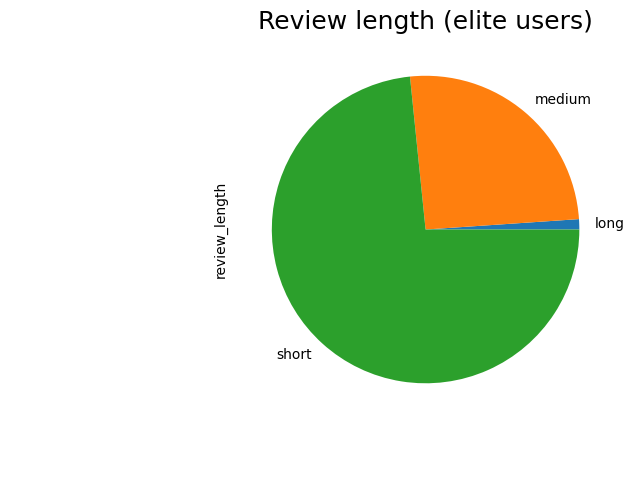

In [39]:
plt.clf()
for_pie_pdf['review_length'].plot(kind='pie', subplots=True)
plt.title('Review length (elite users)', fontsize=18)
plt.show()
%matplot plt

In [40]:
for_pie_pdf2 = review_stats_pandas2.groupby('review_rating').count()
for_pie_pdf2

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

               stars  text  useful  funny  cool  review_length
review_rating                                                 
long              44    44      44     44    44             44
medium          1089  1089    1089   1089  1089           1089
short           8867  8867    8867   8867  8867           8867

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

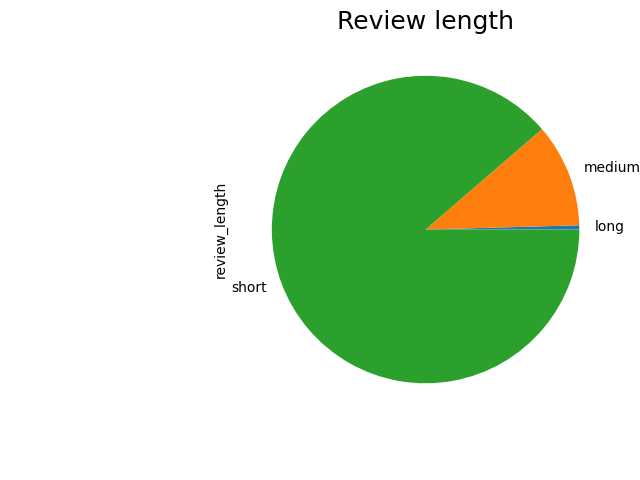

In [41]:
plt.clf()
for_pie_pdf2['review_length'].plot(kind='pie', subplots=True)
plt.title('Review length', fontsize=18)
plt.show()
%matplot plt